**source: https://dentuniverse.tistory.com/entry/TDDPython-unittest-%EC%98%88%EC%A0%9C%EB%A1%9C-%EC%9D%B5%ED%98%80%EB%B3%B4%EA%B8%B03?category=805205**

### 테스트 대상 모듈

In [1]:
import datetime

class DateTimeHelper(object):
    """
    기존의 datetime이 주는 형식(2022-03-16 12:36:53.954430)에서 편의성을 위해
    날짜, 요일로 분리해주는 모듈입니다.
    """
    def today(self):
        """
        오늘 날짜를 반환합니다.
        @returns
            2022-03-16 12:36:53.954430
        """
        
        return datetime.datetime.now()

    def date(self):
        """
        오늘 날짜를 반환합니다. 다만, today함수의 형식과 다른 일/월/년도 형식으로 반환합니다
        @returns
            16/03/22
        """
        return self.today().strftime("%d/%m/%Y")

    def weekday(self):
        """
        오늘 요일을 반환합니다. 
        @returns
            Wednesday
        """
        return self.today().strftime("%A")

    def us_to_korea(self,date):
        """
        미국식 날짜(16/03/22) -> 한국식(2022/03/16) 날짜로 변경합니다.
        @params
            date - 08/12/2016
        @returns
            2022/03/16
        """
        dd, mm, yy = date.split('/')
        date_obj = datetime.date(year=int(yy), month=int(mm), day=int(dd))
        return date_obj.strftime("%Y/%m/%d")

### test1.py

위 모듈에서 us_to_korea 메소드가 정상적으로 동작하는 지 확인

**assertEqual(a, b): a와 b가 같은지를 조사한다.**

In [ ]:
"""
datetimehelper 모듈 테스터
"""
import unittest
import datetimehelper


class DateTimeHelperTestCase(unittest.TestCase):
    """
    Unit Test - testcase class [DateTimeHelper 클래스]
    """
    def setUp(self) -> None:
        '''테스트를 위한 사전 설정'''
        self.obj = datetimehelper.DateTimeHelper()

    
    def test_us_korea_conversion(self):
        """
        미국식 날짜 -> 한국식 날짜 변경 테스트
        """
        # 테스트 케이스 생성
        d1 = '08/12/2016'
        d2 = '24/11/2021'
        d3 = '02/02/2019'
        d4 = '16/03/2021'
        
        # 변수 d1에 있는 데이터를 넣었을때 '2016/12/18'의 값이 나와야 통과된다는 뜻이다.
        self.assertEqual(self.obj.us_to_korea(d1), '2016/12/08')
        self.assertEqual(self.obj.us_to_korea(d2), '2021/11/24')
        self.assertEqual(self.obj.us_to_korea(d3), '2019/02/02')
        self.assertEqual(self.obj.us_to_korea(d4), '2021/03/16')

        
# 중요한 부분은 이 포인트다
# unittest.main()만 불러주면 코드 내부에서 함수이름 앞에 'test'로 명시되어 있는 부분을
# 자동으로 테스트 케이스로 인지하고 실행한다.
if __name__ == '__main__':
    unittest.main()

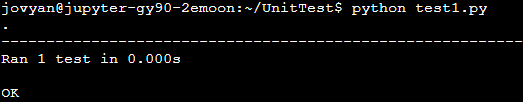

### test2.py

**unittest.mock을 통해 외부 라이브러리 의존성 줄이기**

- DateTimeHelper의 today, date 메소드는 현재 유저가 원하는 테스트 케이스를 만들어서 테스트 할 수 없는 상태 (현재의 시간대에 대해서만 수행 가능)

**mock**

- 메소드를 패치하는 모의 객체

- 외부 서비스/라이브러리에 의존하지 않고 독립적으로 실행이 가능한 단위 테스트를 가능케하는 테스팅 기법

In [ ]:
"""
datetimehelper 모듈 테스터
"""
import datetime
import unittest
from unittest.mock import patch
import datetimehelper


class DateTimeHelperTestCase(unittest.TestCase):
    """
    Unit Test - testcase class [DateTimeHelper 클래스]
    """
    def setUp(self) -> None:
        self.obj = datetimehelper.DateTimeHelper()

    def test_us_korea_conversion(self):
        """
        미국식 날짜 -> 한국식 날짜 변경 테스트
        """
        # 테스트 케이스 생성
        d1 = '08/12/2016'
        d2 = '24/11/2021'
        d3 = '02/02/2019'
        d4 = '16/03/2021'
        self.assertEqual(self.obj.us_to_korea(d1), '2016/12/08')
        self.assertEqual(self.obj.us_to_korea(d2), '2021/11/24')
        self.assertEqual(self.obj.us_to_korea(d3), '2019/02/02')
        self.assertEqual(self.obj.us_to_korea(d4), '2021/03/16')
    
    def test_date(self):
        """
        datetimehelper.py > today() 메소드 테스트
        DateTimeHelper의 today 메서드가 호출될 때 유저가 설정한 test_data값을 반환하도록 가짜 메서드를 설정
        """

        # 테스트를 위한 날짜를 지정해서 만들어줍니다.
        test_date = datetime.datetime(year=2022,month=2,day=10)

        # patch를 통해 today() 메소드에 내가 지정한 날짜를 넣고 테스를 진행합니다.
        #                   객체, 객채의 메소드 명,   테스트용 데이터 
        with patch.object(self.obj, 'today', return_value=test_date):
            response = self.obj.date()
            self.assertEqual(response, '10/02/2022')
            
    def test_weekday(self):
        """
        datetimehelper.py > weekday() 메소드 테스트
        """
        
        # 테스트를 위한 날짜를 지정해서 만들어줍니다.
        test_date = datetime.datetime(year=2022,month=2,day=10)

        # self.obj = datetimehelper.DateTimeHelper()에 있는 today메소드에 테스트를 원하는 데이터를 넣고 테스트를 진행합니다.
        with patch.object(self.obj, 'today', return_value=test_date):
            response = self.obj.weekday()
            self.assertEqual(response, 'Thursday')

    
if __name__ == '__main__':
    unittest.main()

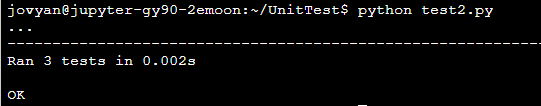

### test3.py

print()를 이용한 unittest 디버깅

- **setUp()** - TestCase클래스의 매 테스트 메소드가 실행하기 전 동작

- **tearDown()** - 매 테스트 메소드가 실행 후 동작

In [ ]:
"""
datetimehelper 모듈 테스터
"""
import datetime
import unittest
from unittest.mock import patch
import datetimehelper
class DateTimeHelperTestCase(unittest.TestCase):
    """
    Unit Test - testcase class [DateTimeHelper 클래스]
    """

    # 전역 변수 선언 => tearDown() 디버깅 용
    response = "tearDown디버깅"

    # 매 테스트 메소드 실행 전 동작 __init__과 같은 역할을 한다고 볼 수 있다.
    def setUp(self) -> None:
        self.obj = datetimehelper.DateTimeHelper()

    
    def test_us_korea_conversion(self):
        """
        미국식 날짜 -> 한국식 날짜 변경 테스트
        """
        # 테스트 케이스 생성
        d1 = '08/12/2016'
        d2 = '24/11/2021'
        d3 = '02/02/2019'
        d4 = '16/03/2021'

        self.response = self.obj.us_to_korea(d1)
        
        self.assertEqual(self.obj.us_to_korea(d1), '2016/12/08')
        self.assertEqual(self.obj.us_to_korea(d2), '2021/11/24')
        self.assertEqual(self.obj.us_to_korea(d3), '2019/02/02')
        self.assertEqual(self.obj.us_to_korea(d4), '2021/03/16')
        
    def test_date(self):
        """
        datetimehelper.py > today() 메소드 테스트
        """

        # 테스트를 위한 날짜를 지정해서 만들어줍니다.
        test_date = datetime.datetime(year=2022,month=2,day=10)

        # patch를 통해 today() 메소드에 내가 지정한 날짜를 넣고 테스를 진행합니다.
        #                   객체, 객채의 메소드 명,   테스트용 데이터 
        with patch.object(self.obj, 'today', return_value=test_date):
            self.response = self.obj.date()
            self.assertEqual(self.response, '10/02/2022')
    
    def test_weekday(self):
        """
        datetimehelper.py > weekday() 메소드 테스트
        """

        # 테스트를 위한 날짜를 지정해서 만들어줍니다.
        test_date = datetime.datetime(year=2022,month=2,day=10)

        # self.obj = datetimehelper.DateTimeHelper()에 있는 today메소드에 테스트를 원하는 데이터를 넣고 테스트를 진행합니다.
        with patch.object(self.obj, 'today', return_value=test_date):
            self.response = self.obj.weekday()
            self.assertEqual(self.response, 'Thursday')

    # 매 테스트 메소드 실행 후 동작 디버깅
    def tearDown(self) -> None:
        '''test_us_korea_conversion, test_date, test_weekday 3가지 테스트에서 사용되는 response값들을 출력'''
        print('결과 : ' + self.response)
    
if __name__ == '__main__':
    unittest.main()

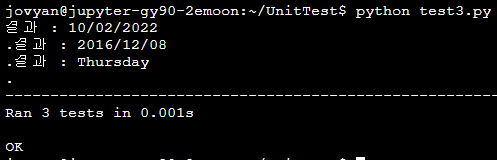